# **Import Necessary Libraries**

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
import pandas as pd
import numpy as np
# for data cleaning
import string
import re
# for removing accented and special chracters
import unicodedata
# for stopwords Removal
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
# for calculating Polarity and Subjectivity
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
# function for making ngrams
from nltk.util import ngrams
# load in all the modules we're going to need
import nltk
import collections
# for Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# **Exploratory Data Analysis**

Now I have the customer feedback data, It's time to perform Exploratory Data Analysis (EDA) to gain insights and understand the data before further proceeding

In [ ]:
review_data=pd.read_csv("yelp_ratings.csv")
review_data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0


In [ ]:
#checking Null value in the dataset

print("The Null values in the dataset")
print(review_data.isnull().sum())

The Null values in the dataset
text         0
stars        0
sentiment    0
dtype: int64


In [ ]:
# showing the distribution of stars in the dataset
print("The distribution of the stars in the dataset")
review_data['stars'].value_counts()

The distribution of the stars in the dataset


5.0    22270
4.0    11061
1.0     7244
2.0     3955
Name: stars, dtype: int64

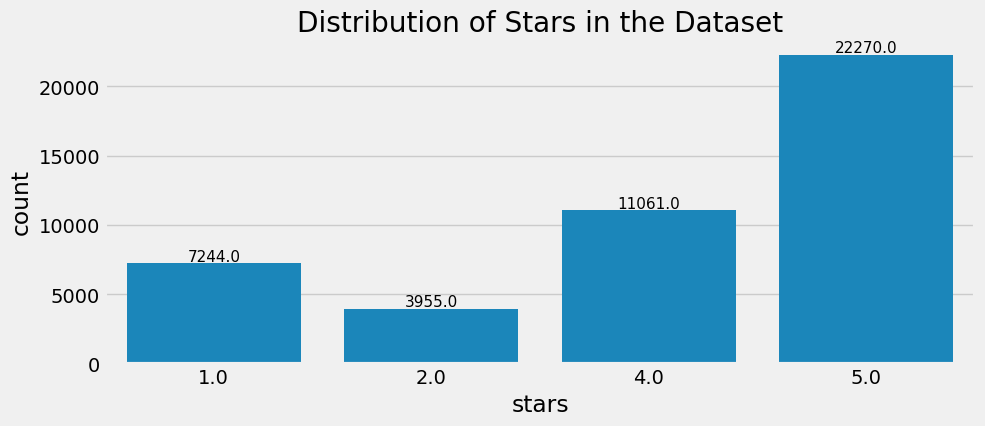

In [ ]:

# Create the countplot
ax = sns.countplot(x='stars', data=review_data)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title
plt.title('Distribution of Stars in the Dataset')

plt.show()


In [ ]:
# showing the distribution of sentiment in the dataset
print("The distribution of the sentiment in the dataset")
review_data['sentiment'].value_counts()

The distribution of the sentiment in the dataset


1    33331
0    11199
Name: sentiment, dtype: int64

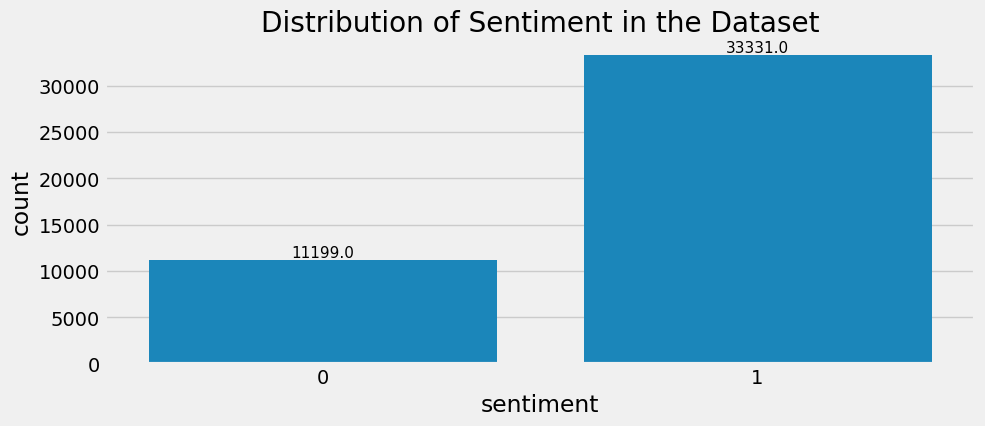

In [ ]:

# Create the countplot
ax = sns.countplot(x='sentiment', data=review_data)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title
plt.title('Distribution of Sentiment in the Dataset')

plt.show()


# ***Observations***



*   There are 44530 records in the dataset
*   There are no null values in the dataset
*   There are three columns in the dataset:text,stars and sentiment
*   There are four categories in stars:1.0,2.0,4.0 and 5.0
*   There are two categories in sentiment:0 and 1,0 is negative sentiment and 1 is postive sentiment.
*   stars 1.0 and 2.0 are considered as negavtive sentiment(0) and stars 4.0 and 5.0 are considered as positive sentiments
*   The dataset is imbalance as we can see from the above figures.








# **Clean the dataset**

In [ ]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

review_data['text'] = review_data['text'].apply(punctuation_removal)

In [ ]:
# lets make a function to remove Numbers from the reviews
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

review_data['text'] = review_data['text'].apply(drop_numbers)

In [ ]:
# lets create a function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

# lets apply the function
review_data['text']  = review_data.apply(lambda x: remove_accented_chars(x['text']), axis = 1)

In [ ]:
# Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]'
    return re.sub(pat, ' ', text)

# lets apply this function
review_data['text'] = review_data.apply(lambda x: remove_special_characters(x['text']), axis = 1)

In [ ]:
# Lets calculate the length of the Reviews
review_data['length'] = review_data['text'].apply(len)

In [ ]:
review_data.head()

,text,stars,sentiment,length
0,Total bill for this horrible service Over Gs T...,1.0,0,191
1,I adore Travis at the Hard Rocks new Kelly Car...,5.0,1,1511
2,I have to say that this office really has it t...,5.0,1,596
3,Went in for a lunch Steak sandwich was delicio...,5.0,1,389
4,Today was my second out of three sessions I ha...,1.0,0,3401


**Text Subjectivity**

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [ ]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
review_data['subjectivity'] = review_data['text'].apply(get_subjectivity)

In [ ]:
## lets summarize the Newly Created Features
review_data[['length','subjectivity']].describe()

,length,subjectivity
count,44530.000000,44530.000000
mean,552.063957,0.561858
std,520.552980,0.136209
min,1.000000,0.000000
25%,219.000000,0.483530
50%,390.000000,0.560000
75%,697.000000,0.641667
max,4886.000000,1.000000


In [ ]:
# calculating the Character Count in the Reviews
review_data['char_count'] = review_data['text'].apply(len)

In [ ]:
# calculating the Word Count
review_data['word_count'] = review_data['text'].apply(lambda x: len(x.split()))

In [ ]:
# Calculating the Word Density
review_data['word_density'] = review_data['char_count'] / (review_data['word_count']+1)

<ipython-input-42-dd432ba8f3a7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_data['subjectivity'])


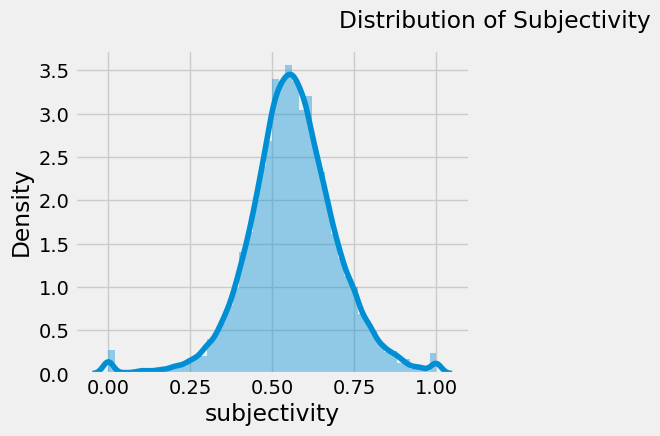

In [ ]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(review_data['subjectivity'])

plt.suptitle('Distribution of Subjectivity')
plt.show()

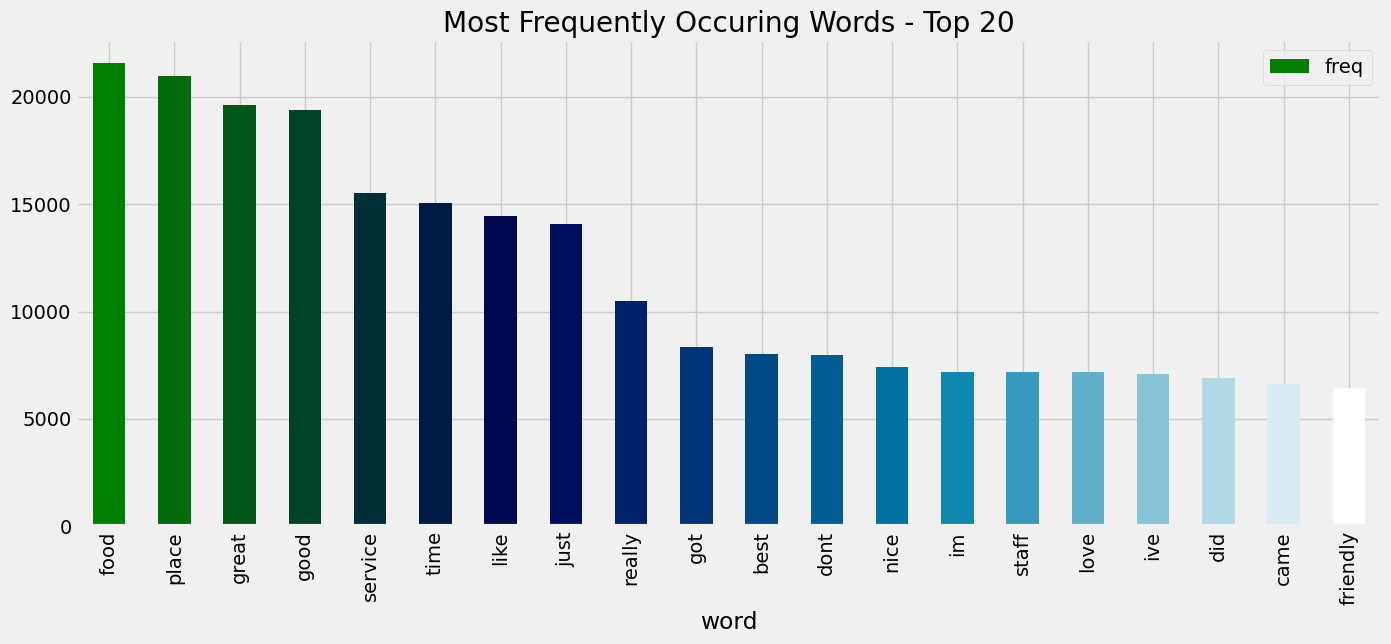

In [ ]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(review_data.text)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

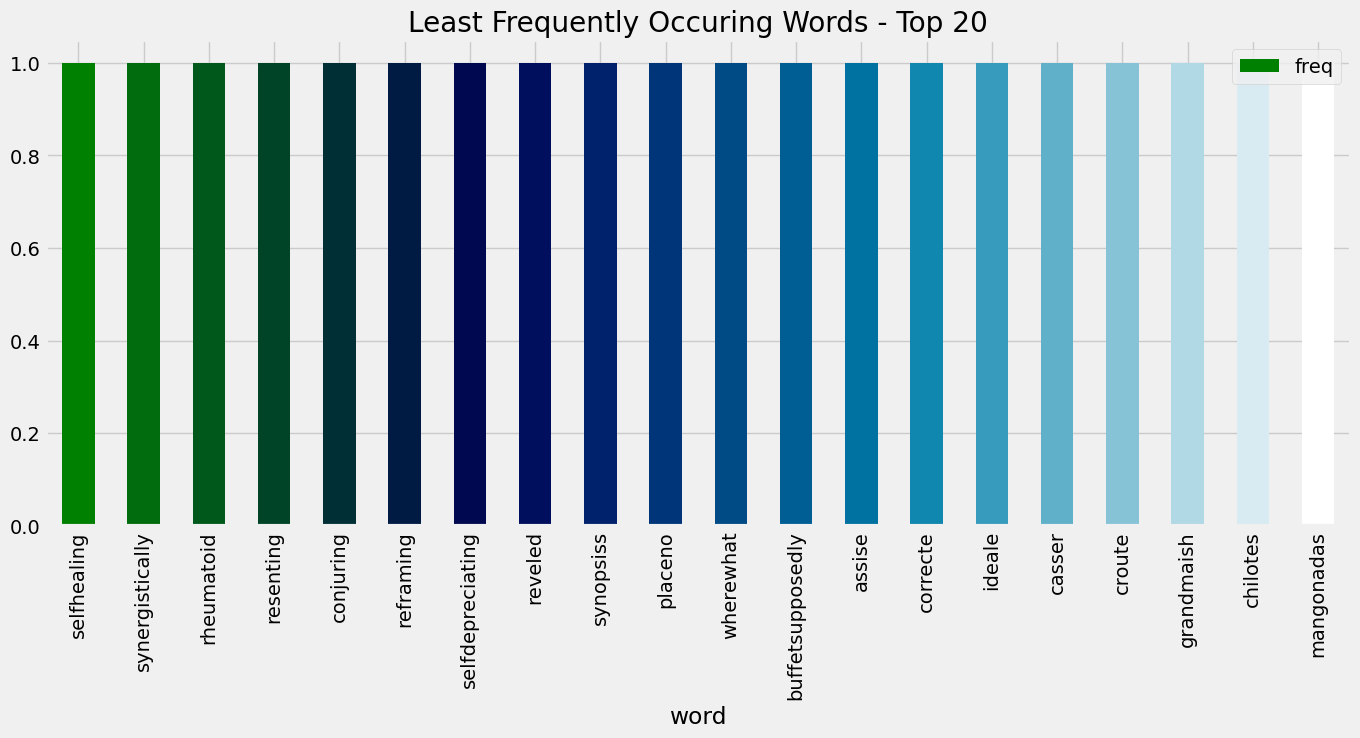

In [ ]:
## Visualizing the Least Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(review_data.text)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

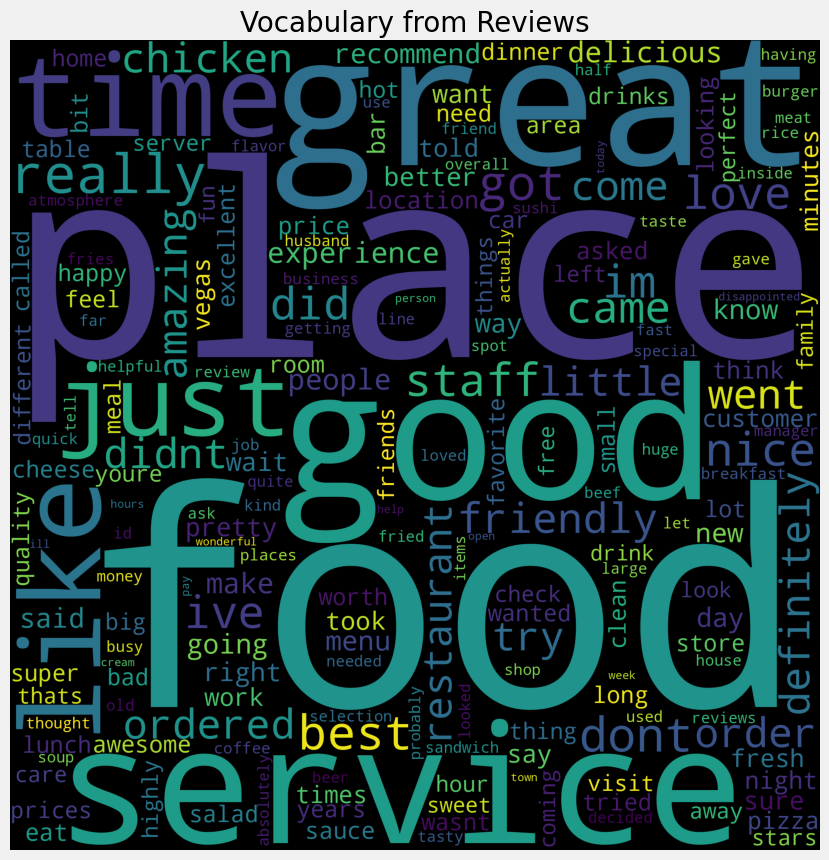

In [ ]:
# lets plot the Wordscloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(review_data.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [ ]:
review_data.head()

,text,stars,sentiment,length,subjectivity,char_count,word_count,word_density
0,Total bill for this horrible service Over Gs T...,1.0,0,191,0.616667,191,36,5.162162
1,I adore Travis at the Hard Rocks new Kelly Car...,5.0,1,1511,0.536668,1511,270,5.575646
2,I have to say that this office really has it t...,5.0,1,596,0.584000,596,107,5.518519
3,Went in for a lunch Steak sandwich was delicio...,5.0,1,389,0.885000,389,67,5.720588
4,Today was my second out of three sessions I ha...,1.0,0,3401,0.432407,3401,665,5.106607


In [ ]:
review_data.to_csv("train_data.csv",index=False)